### 앙상블 학습 (Ensemble Learning)
- 어떤 데이터의 값을 에측한다고 할 때, 하나의 모델만 가지고 결과를 도출할 수도 있지만,  
  여러 개의 모델을 조화롭게 학습시켜 그 모델들의 에측 결과들을 이용한다면, 더 정확한 예측값을 구할 수 있다.
- 여러 개의 분류기를 생성하고 그 예측을 결합하여 1개의 분류기를 사용할 때보다 더 정확하고 신뢰성 높은 예측을 도출하는 기법이다.
- 강력한 하나의 모델을 사용하는 것보다 약한 모델을 여러 개 조합하여 더 정확한 예측에 도움을 주는 방식이다.
- 앙상블 학습의 주요 방법은 배깅(Bagging)과 부스팅(Boosting)이다.

#### 보팅(Voting)
- "하나의 데이터 세트"에 대해 서로 다른 알고리즘을 가진 분류기를 결합하는 방식이다.
- 서로 다른 분류기들에 "동일한 데이터 세트"를 병렬로 학습해서 예측값을 도출하고, 이를 합산하여 최종 예측값을 산출해내는 방식을 말한다.
  

> 1. 하드 보팅 (Hard Voting)
> - 각 분류기가 만든 예측값을 다수결로 투표해서 가장 많은 표를 얻은 예측값을 최종 예측값으로 결정하는 보팅 방식을 말한다.
>
> <img src='./images/hard_voting.png' width='420px'>

> 2. 소프트 보팅 (Soft Voting)
> - 각 분류기가 예측한 타겟별 확률을 평균내어 가장 높은 확률의 타겟을 최종 예측값으로 도출한다.
>
> <img src='./images/soft_voting.png' width='440px'>

#### 배깅 (Bagging, Bootstrap Aggregation)
- 하나의 데이터 세트에서 "여러 번 중복을 허용하면서 학습 데이터 세트를 랜덤하게 뽑은 뒤(Bootstrap)" 하나의 예측기 여러 개를 병렬로 학습시켜서 결과물을 집계(Aggregation)하는 방법이다.
- Voting 방식과 달리 같은 알고리즘의 분류기를 사용하고 훈련 세트를 무작위로 구성하여 각기 다르게(독립적으로, 병렬로) 학습시킨다.
- 학습 데이터가 충분하지 않더라도 충분한 학습효과를 주어 과적합등의 문제를 해결하는 데 도움을 준다.
- 배깅방식을 사용한 대표적인 알고리즘이 바로 랜덤 포레스트 알고리즘이다.

<img src='./images/voting_bagging.png' width='600px'>

#### 부스팅(Boosting)
- 이전 분류기의 학습 결과를 토대로 다음 분류기의 학습 데이터의 샘플 가중치를 조정해서 "순차적으로" 학습을 진행하는 방법이다.
- 이전 분류기를 계속 개선해 나가는 방향으로 학습이 진행되고, 오답에 대한 높은 가중치를 부여하므로 정확도가 높게 나타난다.
- 높은 가중치를 부여하기 때문에 이상치(Outlier)에 취약할 수 있다.

<img src='./images/boosting01.png' width='600px' style='margin-top: 20px'>

> 1. Adaboost(Adaptive boosting)
> - 부스팅에서 가장 기본 기법이며, 결정 트리와 비슷한 알고리즘을 사용하지만 뻗어나가지(tree) 않고 하나의 조건식만 사용(stump)하여 결정한다.
> - 여러 개의 stump로 구성되어 있으며, 이를 Forest of stumps라고 한다.
> - stump는 조건식 한 개와 두 갈래의 참, 거짓 리프 노드가 있는 형태이다.
> - tree와 다르게, stump는 단 하나의 질문으로 데이터를 분류해야하기 때문에 약한 학습기(weak learner)이다.
>   
> <img src='./images/boosting02.png' width='400px'>

> - 결과에 미치는 영향이 큰 stump를 Amount of Say가 높다(가중치가 높다)고 한다.
> - 각 stump의 error는 다음 stump의 결과에 영향을 미치고 줄줄이 마지막 스텀프까지 영향을 미친다.
> - 모든 stump의 Amount of Say를 수치로 구한 뒤 합치면, Total Amount of Say가 나오고 이를 통해 최종 분류가 된다.
> - 하나의 stump는 약한 학습기이지만 여러 스텀프를 모으면 강한 학습기가 된다.
>   
> <img src='./images/amount_of_say.png' width='300px'>
>
> - Total Error가 0이면 항상 올바른 분류를 한다는 뜻이고, 1이면 항상 반대로 분류를 한다는 뜻이다.
> - 만약 Total Error가 0.5라면 Amount of Say는 0이고, 이는 확률이 반반이기 때문에 분류기로서 분류 결과를 랜덤으로 판단하는 것과 같다.


> 2. GBM(Gradient Boost Machine)
> - Adaboost와 유사하지만, 에러를 최소화하기 위해 가중치를 업데이트할 때 경사 하강법(Gradient Descent)을 이용한다.
> - GBM은 과적합에도 강하고 뛰어난 성능을 보이지만, 병렬 처리가 되지 않아서 수행 시간이 오래 걸린다는 단점이 있다.
> - 경사 하강법이란, 오류를 최소화하기 위해 Loss function의 최소값까지 점차 하강하면서 찾아나가는 기법이다.
> - 모델 A를 통해 y를 에측하고 남은 잔차(residual, 에러의 비율)를 다시 B라는 모델을 통해 예측하고 A + B모델을 통해 y를 예측하는 방식이다.
> - 잔차를 계속 줄여나가며, 훈련 데이터 세트를 잘 예측하는 모델을 만들 수 있게 된다.
> - 잔차를 계속 줄이다보면 복잡도가 증가하여 과적합이 일어날 수도 있다는 단점이 있다.
>   
> <img src='./images/gradient_boost.png' width='700px' style='margin-top: 20px'>


> 3. XGBoost(eXtra Gradient Boost)
> - 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나이며, 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능을 나타낸다.
> - GBM에 기반하고 있지만 병렬 CPU 환경에서 병렬 학습이 가능하기 때문에 기존 GBM보다 빠르게 학습을 완료할 수 있다.
> - 하이퍼 파라미터를 조정하여 분할 깊이를 변경할 수 있지만, tree pruning(가지치기)으로 더 이상 긍정 이득이 없는 분할을 가지치기해서 분할 수를 줄이는 추가적인 장점을 가지고 있다.
>   
> <img src='./images/xgboost.png' width='900px' style='margin-top: 20px'>

> - 조기 중단 기능(Early Stopping)은 특정 반복 횟수만큼 더 이상 loss function이 감소하지 않으면 수행을 종료할 수 있다. 학습시간을 단축시킬 수 있으며, 최적화 튜닝 시 적절하게 사용 가능하다.
> - 하지만, 반복 횟수를 너무 낮게 설정하면, 최적화 전에 학습이 종료될 수 있기 때문에 조심해야 한다.
>
> <img src='./images/early_stopping.png' width= '400px'>


> 4. LightGBM(Light Gradient Boosting Machine)
> - XGBoost의 향상된 버전으로서 결정트리 알고리즘을 기반으로 순위 지정, 분류 및 기타 여러 기계 학습 작업에 사용할 수 있다.
> - 기존 부스팅 방식과 마찬가지로 각각의 새로운 분류기가 이전 트리의 잔차를 조정해서 모델이 향상되는 방식으로 결합되고, 마지막으로 추가된 트리는 각 단계의 결과를 집계하여 강력한 분류기가 될 수 있다.
> - XGBoost와 달리 GOSS 알고리즘을 사용해서 수직으로 트리를 성장시킨다. 즉, 다른 알고리즘은 레벨(depth)단위로 성장시키지만, LightGBM은 리프(leaf) 단위로 성장시킨다.
> - 인코딩을 따로 할 필요 없이 카테고리형 feature를 최적으로 변환하고 이에 따른 노드 분할을 수행한다.  
>   astype('category')로 변환할 수 있으며, 이는 다른 다양한 인코딩 방식보다 월등히 우수하다.
> - GOSS 논문  
>   https://proceedings.neurips.cc/paper_files/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf 
> 
> <img src='./images/lightGBM01.png' width='600px'>
>
>   
> <div style="display: flex;">
    <div>
        <img src="./images/lightGBM02.png" width="400"> 
    </div>
    <div>
        <img src="./images/goss.png" width="300">  
    </div>
</div>

#### 보팅 (Voting)
**VotingClassifier(n_estimators, voting)**
- n_estimators: 추가할 모델 객체를 list형태로 전달한다. 각 모델은 튜플 형태로 ('key', model)로 작성한다.
- voting: 'soft', 'hard' 둘 중 선택한다(default: 'hard')

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
c_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
c_df['target'] = cancer.target

c_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
c_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [5]:
c_df.duplicated().sum()

0

In [8]:
corr = c_df.corr()
corr[['target']].sort_values(by='target', ascending=False)[1:]

,target
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522
fractal dimension error,-0.077972
concavity error,-0.253730
compactness error,-0.292999
worst fractal dimension,-0.323872
mean symmetry,-0.330499
mean smoothness,-0.358560


Text(0.5, 1.0, 'Correlation')

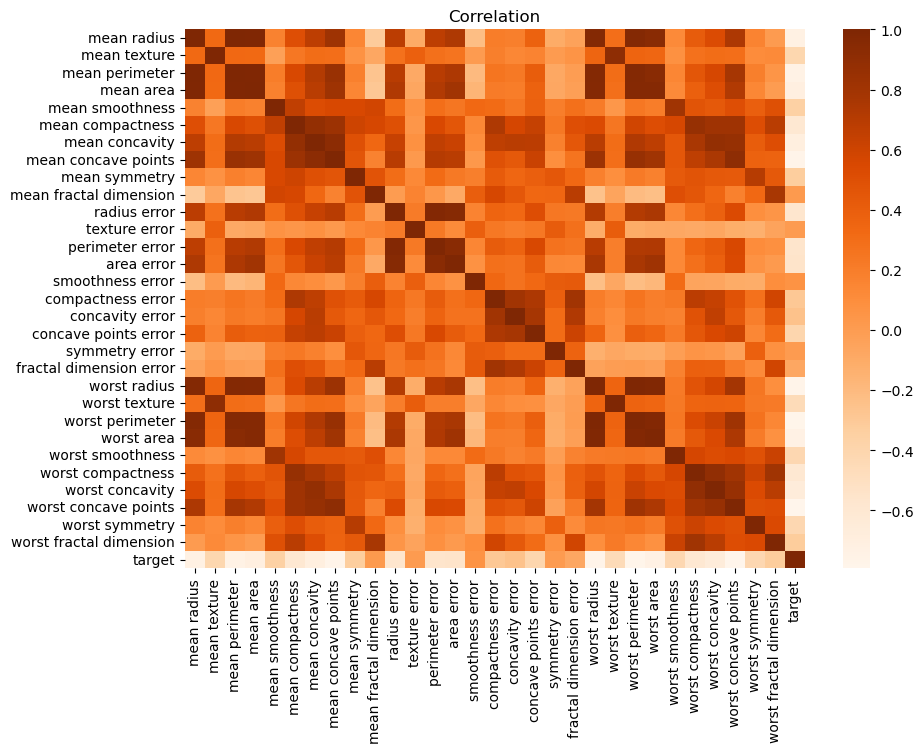

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))

heatmap = sns.heatmap(corr, cmap='Oranges')
heatmap.set_title('Correlation')

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>],
       [<Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>],
       [<Axes: title={'center': 'symmetry error'}>

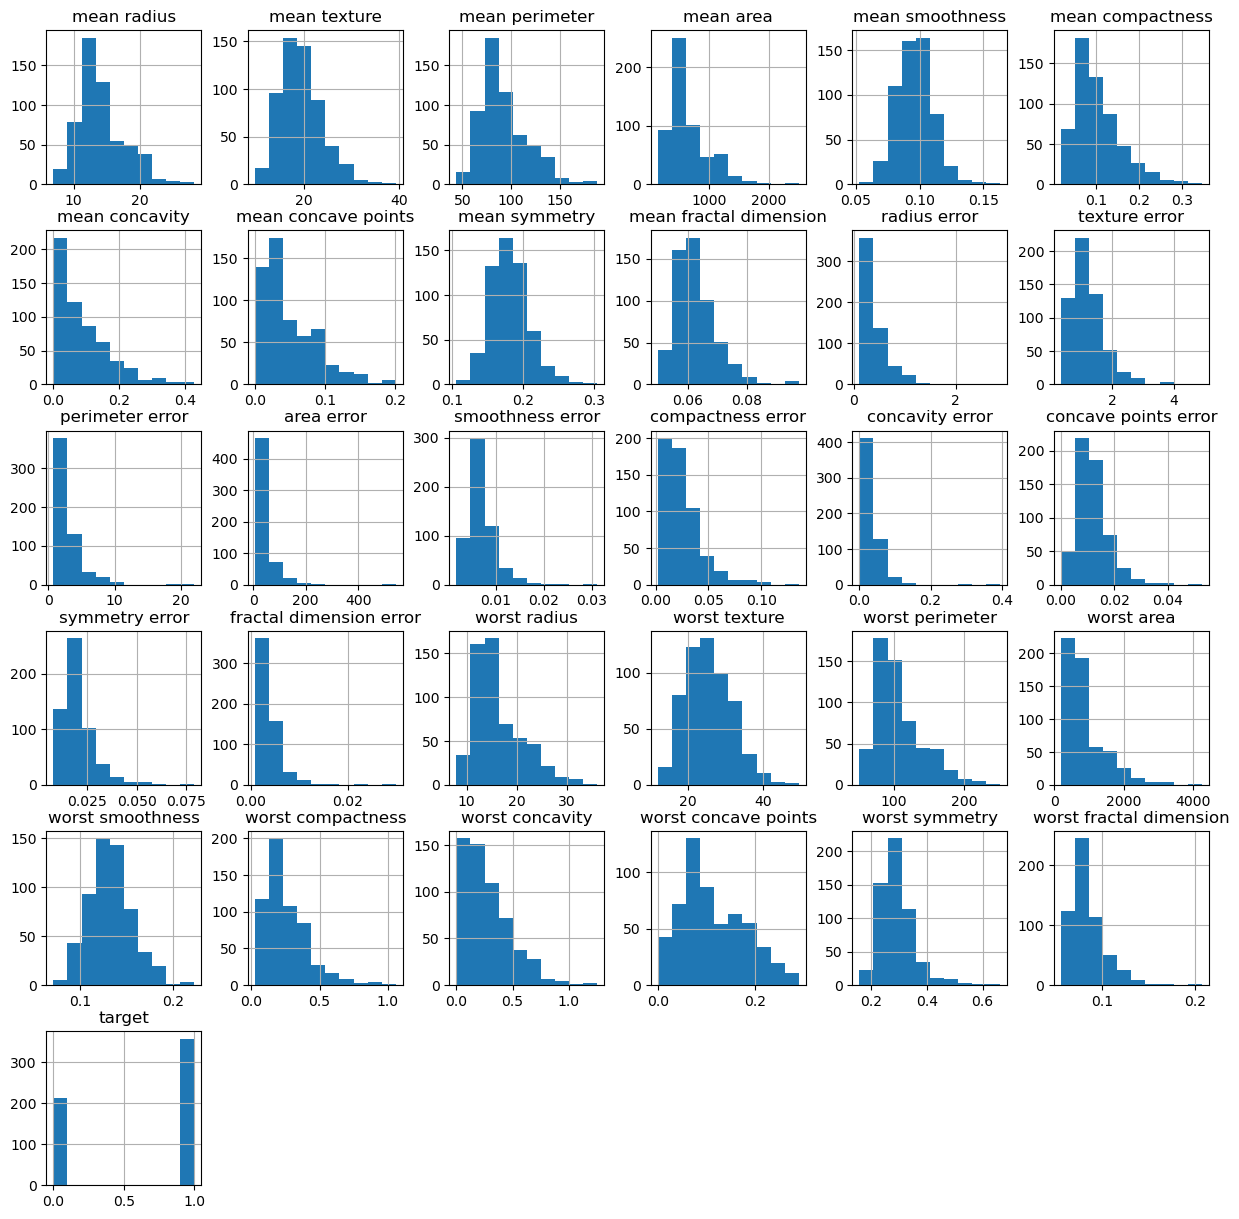

In [11]:
c_df.hist(figsize=(15, 15))

In [15]:
# conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)


smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()

target
0    285
1    285
Name: count, dtype: int64

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

dtc_parameters = {'max_depth':[10, 11, 12] , 'min_samples_split': [20, 21, 22]}
svc_parameters = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                 'svc__kernel' : ['linear', 'rbf']}
knn_c_parameters = {'knn__n_neighbors' : [3, 5, 7, 9, 11]}

dtc = DecisionTreeClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()


g_dtc = GridSearchCV(dtc, param_grid = dtc_parameters, cv=5, refit= True, return_train_score= True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit= True, return_train_score= True)

knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_c_parameters, cv=5, refit= True, return_train_score= True)



In [27]:
g_dtc.fit(X_train_over, y_train_over)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_split': [20, 21, 22]},
             return_train_score=True)

In [30]:
g_svc.fit(X_train_over, y_train_over)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [38]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [29]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 20}",0.931579,6
1,"{'max_depth': 10, 'min_samples_split': 21}",0.931579,6
2,"{'max_depth': 10, 'min_samples_split': 22}",0.929825,8
3,"{'max_depth': 11, 'min_samples_split': 20}",0.933333,4
4,"{'max_depth': 11, 'min_samples_split': 21}",0.933333,2
5,"{'max_depth': 11, 'min_samples_split': 22}",0.935088,1
6,"{'max_depth': 12, 'min_samples_split': 20}",0.933333,4
7,"{'max_depth': 12, 'min_samples_split': 21}",0.933333,2
8,"{'max_depth': 12, 'min_samples_split': 22}",0.928070,9


In [36]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(svc_result_df['params'][0])
display(svc_result_df)

{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}


,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.942105,40
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.761404,56
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.942105,40
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.919298,47
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.942105,40
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",0.801754,53
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.970175,24
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.596491,61
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",0.970175,24


In [54]:
from sklearn.preprocessing import StandardScaler

svc = SVC(C=0.001, kernel='linear', probability=True)
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=0.001, kernel='linear', probability=True))])

In [42]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(knn_result_df['params'].iloc[3])

display(knn_result_df)

{'knn__n_neighbors': 9}


,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.977193,1
1,{'knn__n_neighbors': 5},0.963158,2
2,{'knn__n_neighbors': 7},0.963158,2
3,{'knn__n_neighbors': 9},0.961404,5
4,{'knn__n_neighbors': 11},0.963158,2


In [43]:
knn = KNeighborsClassifier(n_neighbors=9)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
knn_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [44]:
from sklearn.ensemble import VotingClassifier
# 오차 행렬 (hard)
# [[39  3]
#  [ 6 66]]
# 정확도: 0.9211, 정밀도: 0.9565, 재현율: 0.9167, F1: 0.9362
vc = VotingClassifier(estimators=[('dtc', dtc), ('svc', svc_pipe), ('knn', knn_pipe)], voting='hard', n_jobs=-1)
# 오차 행렬 (soft)
# [[41  1]
#  [ 7 65]]
# 정확도: 0.9298, 정밀도: 0.9848, 재현율: 0.9028, F1: 0.9420

In [45]:
vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=11,
                                                     min_samples_split=22)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(C=0.001,
                                                   kernel='linear'))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=9))]))],
                 n_jobs=-1)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):

    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)

    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        
        plt.show()

In [47]:
prediction = vc.predict(X_test)

오차 행렬
[[39  3]
 [ 6 66]]
정확도: 0.9211, 정밀도: 0.9565, 재현율: 0.9167, F1: 0.9362
################################################################################


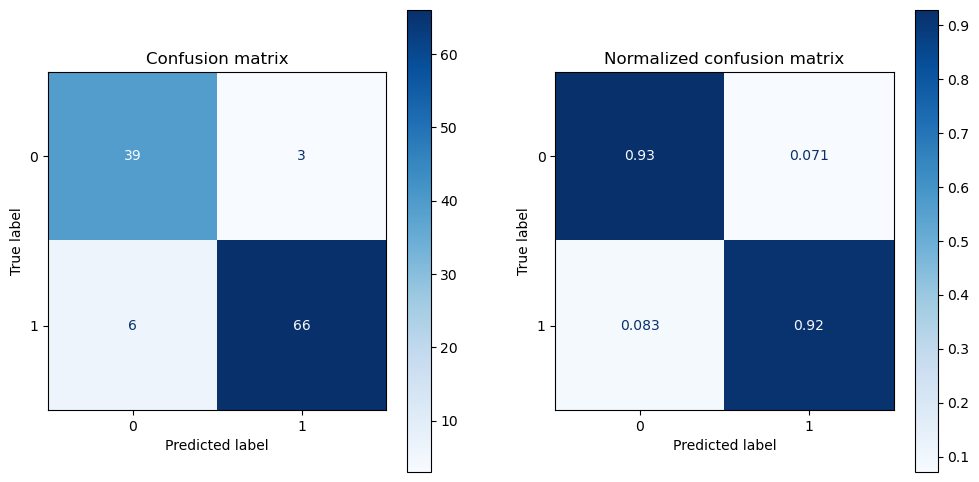

In [50]:
get_evaluation(y_test, prediction, vc, X_test)

In [55]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('dtc', dtc), ('svc', svc_pipe), ('knn', knn_pipe)], voting='soft', n_jobs=-1)


In [56]:
vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=11,
                                                     min_samples_split=22)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(C=0.001, kernel='linear',
                                                   probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=9))]))],
                 n_jobs=-1, voting='soft')

In [57]:
prediction = vc.predict(X_test)

오차 행렬
[[41  1]
 [ 7 65]]
정확도: 0.9298, 정밀도: 0.9848, 재현율: 0.9028, F1: 0.9420
################################################################################


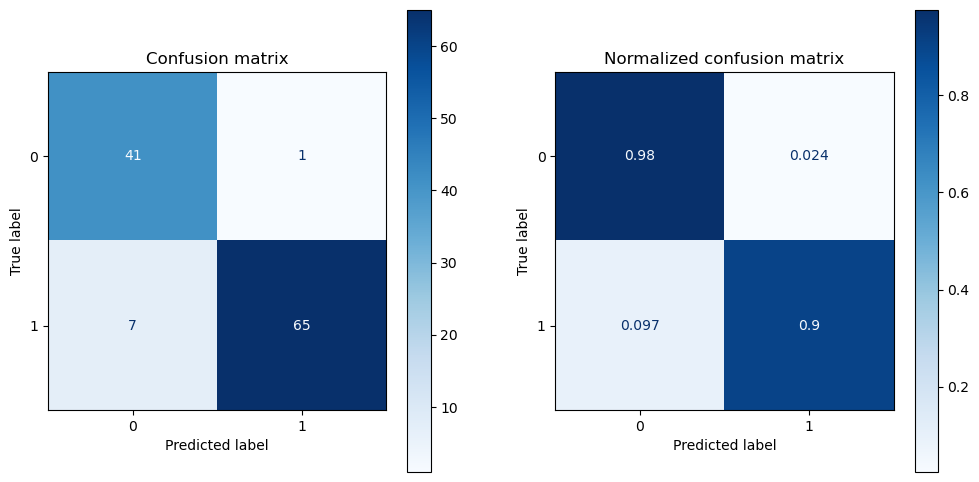

In [58]:
get_evaluation(y_test, prediction, vc, X_test)

#### 배깅 (Bagging) - 랜덤 포레스트 (Random Forest)
**RandomForestClassifier(n_estimators, min_samples_split, min_samples_leaf, n_jobs)**

- n_estimators: 생성할 tree(모델)의 개수를 작성한다.(default: 50)

In [59]:
import pandas as pd

c_df = pd.read_csv('./datasets/car.csv')
c_df

,Price,Main_cost,Doors,Persons,Lug_cap,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [61]:
pre_c_df = c_df.copy()

In [66]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for column in c_df.columns:
    encoder = LabelEncoder()
    pre_c_df[column] = encoder.fit_transform(c_df[column].tolist())
    encoders[column] = encoder
    print(f'{column}: {encoder.classes_}')

Price: ['high' 'low' 'med' 'vhigh']
Main_cost: ['high' 'low' 'med' 'vhigh']
Doors: ['2' '3' '4' '5more']
Persons: ['2' '4' 'more']
Lug_cap: ['big' 'med' 'small']
Safety: ['high' 'low' 'med']
Decision: ['acc' 'good' 'unacc' 'vgood']


In [68]:
c_df.Price.value_counts()

Price
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

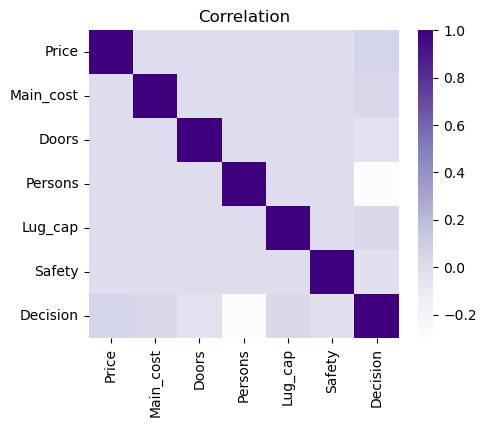

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,4))
corr =pre_c_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Main_cost'}>,
        <Axes: title={'center': 'Doors'}>],
       [<Axes: title={'center': 'Persons'}>,
        <Axes: title={'center': 'Lug_cap'}>,
        <Axes: title={'center': 'Safety'}>],
       [<Axes: title={'center': 'Decision'}>, <Axes: >, <Axes: >]],
      dtype=object)

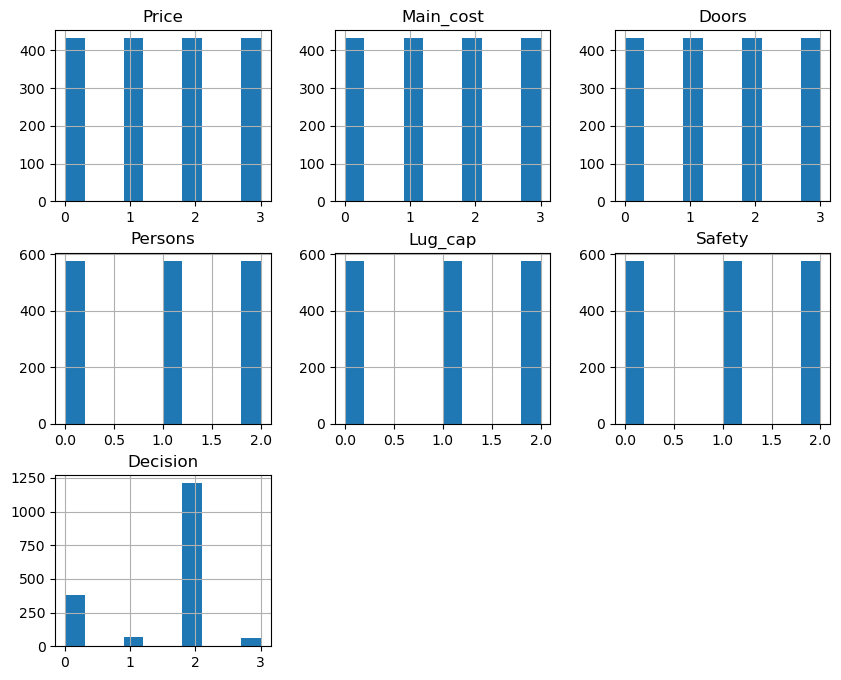

In [72]:
pre_c_df.hist(figsize=(10, 8))

Decision sampling이 관건

In [74]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'max_depth': [1,2,3],
    'min_samples_split': [6, 12, 18, 24]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets = pre_c_df.iloc[:, 1:], pre_c_df.Price

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

g_rfc = GridSearchCV(rfc, param_grid =parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_split': [6, 12, 18, 24]})

In [75]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(result_df['params'].iloc[3])

display(result_df)

{'max_depth': 4, 'min_samples_split': 24}


,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 6}",0.248201,2
1,"{'max_depth': 4, 'min_samples_split': 12}",0.252544,1
2,"{'max_depth': 4, 'min_samples_split': 18}",0.247482,3
3,"{'max_depth': 4, 'min_samples_split': 24}",0.247461,4
4,"{'max_depth': 6, 'min_samples_split': 6}",0.170749,9
5,"{'max_depth': 6, 'min_samples_split': 12}",0.172912,8
6,"{'max_depth': 6, 'min_samples_split': 18}",0.193901,6
7,"{'max_depth': 6, 'min_samples_split': 24}",0.209827,5
8,"{'max_depth': 8, 'min_samples_split': 6}",0.102038,18
9,"{'max_depth': 8, 'min_samples_split': 12}",0.123741,15


In [76]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):

    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')

    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        
        plt.show()

오차 행렬
[[18 11 11 47]
 [12 21 23 30]
 [18 15 13 41]
 [26 14  7 39]]
정확도: 0.2630, 정밀도: 0.2692, 재현율: 0.2635, F1: 0.2537
################################################################################


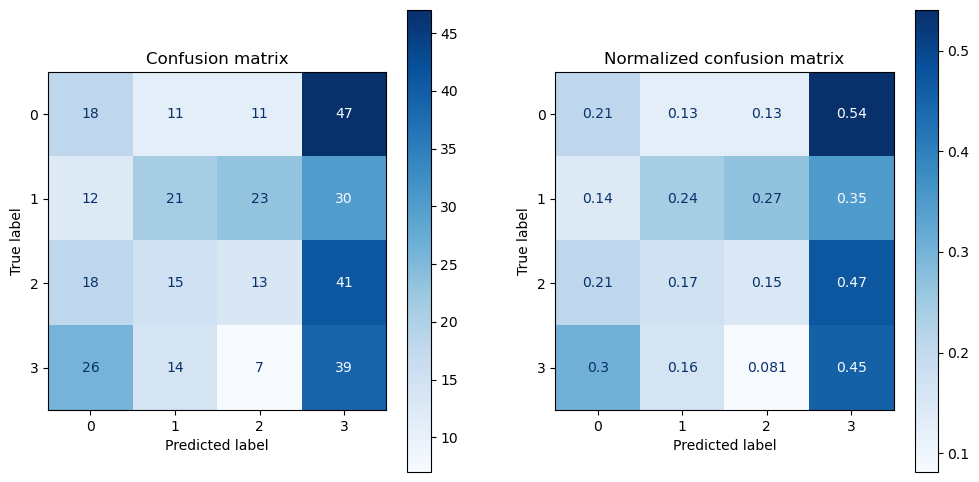

In [78]:
get_evaluation(y_test, prediction, rfc, X_test)

In [79]:
from sklearn.inspection import permutation_importance


importance = permutation_importance(rfc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([5, 3, 0, 4, 2, 1], dtype=int64)

In [81]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

Decision: 0.0696
Lug_cap: -0.0064
Main_cost: -0.0122
Safety: -0.0241
Persons: -0.0329
Doors: -0.0397


#### 1 Cycle 결과
Decision feature에 중요도가 그나마 높게 나왔지만,   
그 수치가 너무 작기 때문에 전체적으로 비율을 맞춰주는 MinMaxScaler()로 스케일링 하기로 한다.

In [84]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'rfc__max_depth': [1,2,3],
    'rfc__min_samples_split': [6, 12, 18, 24]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets = pre_c_df.iloc[:, 1:], pre_c_df.Price

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

rfc_pipe = Pipeline([('min_max_scaler', MinMaxScaler()), ('rfc', rfc)])


g_rfc = GridSearchCV(rfc_pipe, param_grid =parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [1, 2, 3],
                         'rfc__min_samples_split': [6, 12, 18, 24]})

In [85]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(result_df['params'].iloc[3])

display(result_df)

{'rfc__max_depth': 1, 'rfc__min_samples_split': 24}


,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.227218,12
1,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.238057,9
2,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.236623,11
3,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.237342,10
4,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.262616,6
5,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.248175,8
6,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.261219,7
7,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.265567,3
8,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.262637,5
9,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.269925,1


In [86]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)

오차 행렬
[[16  1 19 51]
 [11 14 29 32]
 [13 11 18 45]
 [24  4 13 45]]
정확도: 0.2688, 정밀도: 0.3012, 재현율: 0.2692, F1: 0.2544
################################################################################


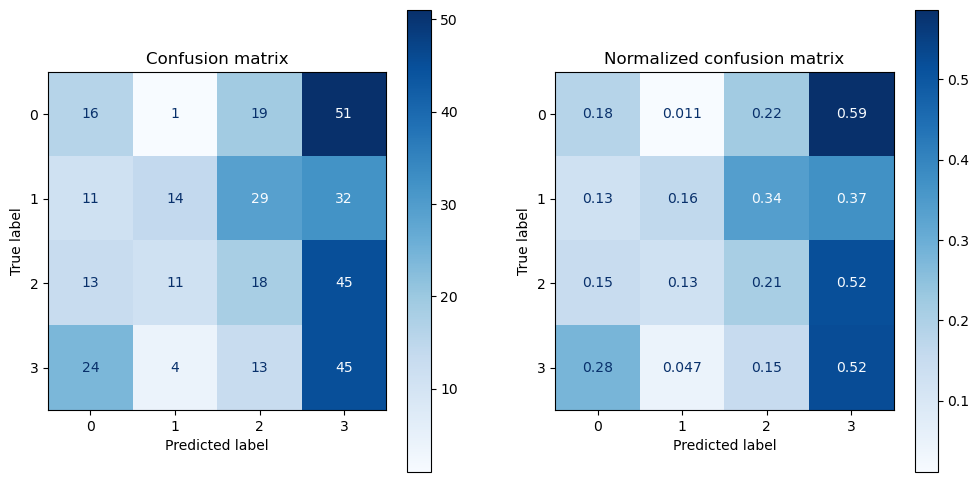

In [87]:
get_evaluation(y_test, prediction, rfc, X_test)

#### Last Cycle 결과
전체 데이터에 MinMaxScaler()로 스케일링 하였지만, 소폭 성능이 상승하였다.  
패턴을 분석할 수 있는 데이터가 더 수집되어야 할 것으로 보인다.

-------------------

#### 부스팅(Boosting)
**AdaBoostClassifier(base_estimators, n_estimators, learning_rate)**
- base_estimators: 학습에 사용하는 알고리즘을 선택한다(default: DecisionTreeClassifier(max_depth=1)).
- n_estimators: 생성할 약한 학습기의 개수를 지정한다(default: 50).
- learning_rate: 학습을 진행할 때마다 적용하는 학습률(0~1사이의 값), 약한 학습기가 순차적으로 오류값을 보정해나갈 때 적용하는 계수이며, 낮은 만큼 최소 손실값을 찾아 예측성능이 높아질 수 있지만, 그 만큼 많은 수의 트리가 필요하고 시간이 많이 소요된다(default: 1)

🎈 학습률  
책 100p를 10명의 학생이 공부한다고 했을 때, 10p씩 공부한다.  
이 때, 1명의 학습률을 0.1로 낮추면, 10p를 공부하는 데 10명이 필요하다.  
위 예시를 에이다 부스팅에 적용하면, 학생 1명이 stump 1개이고 페이지 수가 학습양이다.  
학습률을 낮출 수록 더 자세히 즉, 손실값을 꼼꼼히 잘 볼 수 있지만 그 만큼 많은 학생이 필요하고 시간도 더 걸린다.

In [1]:
import pandas as pd

w_df = pd.read_csv('./datasets/water_potability.csv')
w_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [2]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
w_df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
w_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
pre_w_df = w_df.copy()

In [6]:
pre_w_df['ph'] = w_df['ph'].fillna(w_df['ph'].median())

In [7]:
pre_w_df['Sulfate'] = w_df['Sulfate'].fillna(w_df['Sulfate'].median())

In [8]:
pre_w_df['Trihalomethanes'] = w_df['Trihalomethanes'].fillna(w_df['Trihalomethanes'].median())

In [9]:
pre_w_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

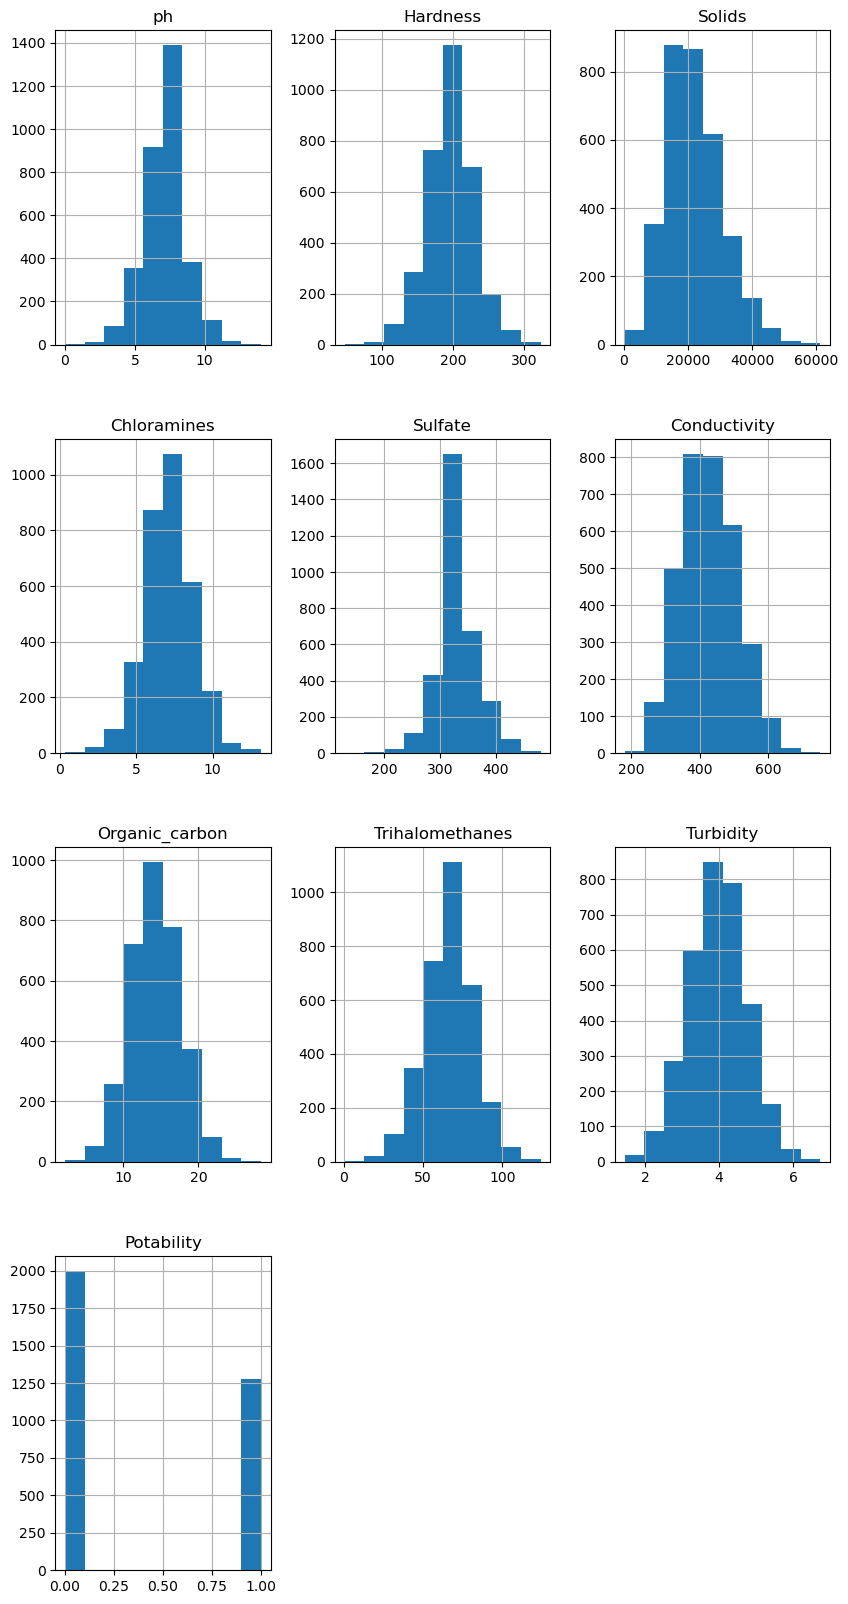

In [11]:
pre_w_df.hist(figsize=(10,20))

In [12]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_pre_w = std.fit_transform(pre_w_df.iloc[:,:-1])

In [15]:
std_pre_w_df = pd.DataFrame(std_pre_w, columns=pre_w_df.iloc[:, :-1].columns)
std_pre_w_df['Potability'] = pre_w_df.Potability
std_pre_w_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298,0
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218,0
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365,0
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412,0
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.637002,-0.081758,2.916188,0.028027,0.728872,1.240155,-0.118075,0.017772,0.601124,1
3272,0.499833,-0.085667,-0.534295,0.593290,-0.014799,-0.417706,1.698560,0.013636,-1.497627,1
3273,1.595654,-0.626829,1.270810,0.144017,-0.014799,0.072263,-0.981329,0.218038,-0.856007,1
3274,-1.324949,1.041355,-1.144058,-0.517373,-0.014799,-0.288597,-0.942064,0.702756,0.950797,1


array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

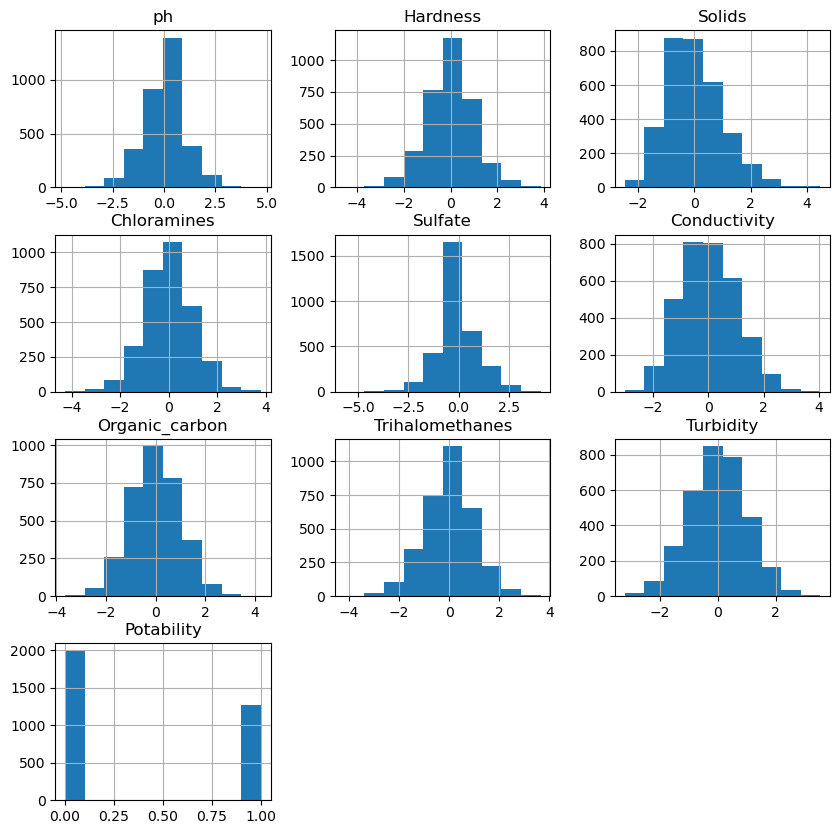

In [16]:
std_pre_w_df.hist(figsize=(10,10))

In [17]:
pre_w_df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

features, targets = pre_w_df.iloc[:,:-1], pre_w_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [20]:
y_train_over.value_counts()

Potability
0    1598
1    1598
Name: count, dtype: int64

In [22]:
X_train_over.duplicated().sum()

0

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    'n_estimators' : [50, 100, 150],
    'learning_rate' : [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]})

In [24]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.556644,12
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.564776,10
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.566969,9
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.561652,11
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.572909,4
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.569471,8
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.572913,3
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.576669,1
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.573851,2
9,"{'learning_rate': 1, 'n_estimators': 50}",0.570094,6


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [26]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)

오차 행렬
[[229 171]
 [132 124]]
정확도: 0.5381, 정밀도: 0.4203, 재현율: 0.4844, F1: 0.4501, ROC-AUC: 0.5284
################################################################################


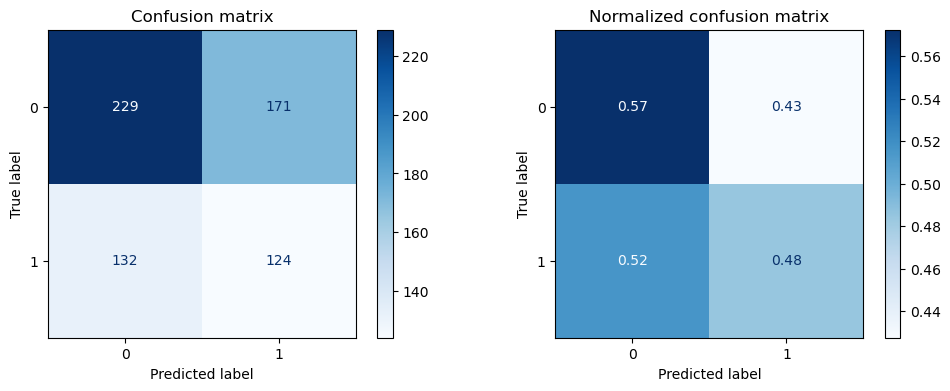

In [27]:
get_evaluation(y_test, prediction, ada, X_test)

#### 1 Cycle
Positive 예측 성공률이 낮기 때문에, 전체 스케일링을 하고자 한다.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

parmeters = {
    'ada__n_estimators': [50, 100, 150],
    'ada__learning_rate': [0.3, 0.5, 0.7, 1]
}

ada_pipe = Pipeline([('standard_scaler', StandardScaler()), ('ada', AdaBoostClassifier())])

g_ada = GridSearchCV(ada_pipe, param_grid=parmeters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.3, 0.5, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150]})

In [29]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(g_ada.cv_results_['params'][7])
display(result_df)

{'ada__learning_rate': 0.7, 'ada__n_estimators': 100}


,params,mean_test_score,rank_test_score
0,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.556644,12
1,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.564776,10
2,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.566969,9
3,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.561652,11
4,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.572909,4
5,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.569471,8
6,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.572913,3
7,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.576669,1
8,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.573851,2
9,"{'ada__learning_rate': 1, 'ada__n_estimators':...",0.570094,6


In [30]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)

오차 행렬
[[229 171]
 [132 124]]
정확도: 0.5381, 정밀도: 0.4203, 재현율: 0.4844, F1: 0.4501, ROC-AUC: 0.5284
################################################################################


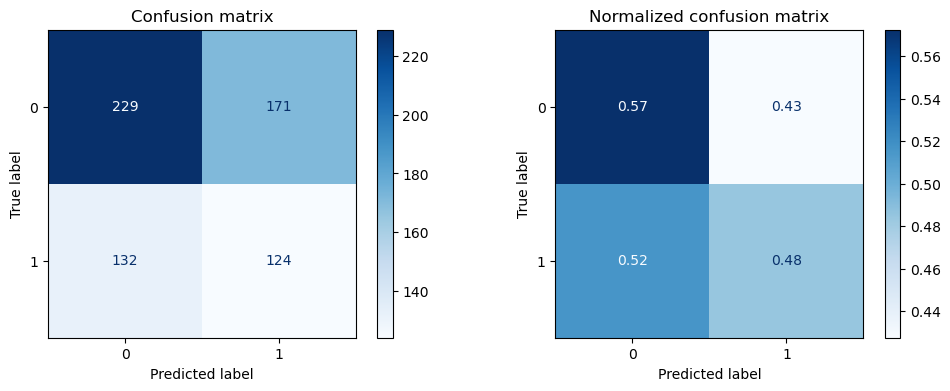

In [31]:
get_evaluation(y_test, prediction, ada, X_test)

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

parmeters = {
    'ada__n_estimators': [50, 100, 150],
    'ada__learning_rate': [0.3, 0.5, 0.7, 1]
}

ada_pipe = Pipeline([('min_max_scaler', MinMaxScaler()), ('ada', AdaBoostClassifier())])

g_ada = GridSearchCV(ada_pipe, param_grid=parmeters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.3, 0.5, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150]})

In [33]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(g_ada.cv_results_['params'][7])
display(result_df)

{'ada__learning_rate': 0.7, 'ada__n_estimators': 100}


,params,mean_test_score,rank_test_score
0,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.556644,12
1,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.564776,10
2,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.566969,9
3,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.561652,11
4,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.572909,4
5,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.569471,8
6,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.572913,3
7,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.576669,1
8,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.573851,2
9,"{'ada__learning_rate': 1, 'ada__n_estimators':...",0.570094,6


In [34]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)


오차 행렬
[[229 171]
 [132 124]]
정확도: 0.5381, 정밀도: 0.4203, 재현율: 0.4844, F1: 0.4501, ROC-AUC: 0.5284
################################################################################


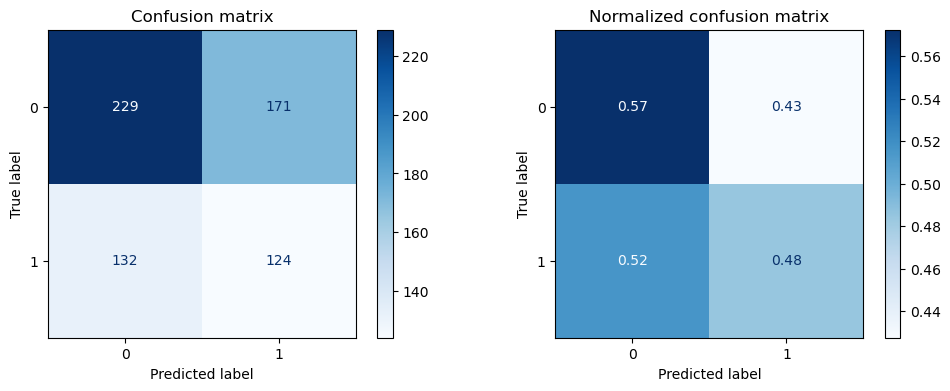

In [35]:
get_evaluation(y_test, prediction, ada, X_test)

#### 2 Cycle
변화가 전혀 없다. 이상치를 제거해보기로 한다.

In [36]:
features = std_pre_w_df.iloc[:, :-1]
for column in features.columns:
    std_pre_w_df.drop(
        std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].shape[0]}건')

ph: 0건
Hardness: 0건
Solids: 0건
Chloramines: 0건
Sulfate: 0건
Conductivity: 0건
Organic_carbon: 0건
Trihalomethanes: 0건
Turbidity: 0건


In [37]:
pre_w_df = pre_w_df.iloc[std_pre_w_df.index].reset_index(drop=True)
pre_w_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
4,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0
...,...,...,...,...,...,...,...,...,...,...
2040,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2041,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
2042,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
2043,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1


In [38]:
pre_w_df.iloc[:, -1].value_counts()

Potability
0    1288
1     757
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [41]:
y_train_over.value_counts()

Potability
1    1030
0    1030
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parmeters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=parmeters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]})

In [43]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.561165,12
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.572330,6
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.566019,10
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.572816,4
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.572816,4
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.570388,7
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.575728,3
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.566505,9
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.569417,8
9,"{'learning_rate': 1, 'n_estimators': 50}",0.581068,1


In [44]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)

오차 행렬
[[134 124]
 [ 81  70]]
정확도: 0.4988, 정밀도: 0.3608, 재현율: 0.4636, F1: 0.4058, ROC-AUC: 0.4915
################################################################################


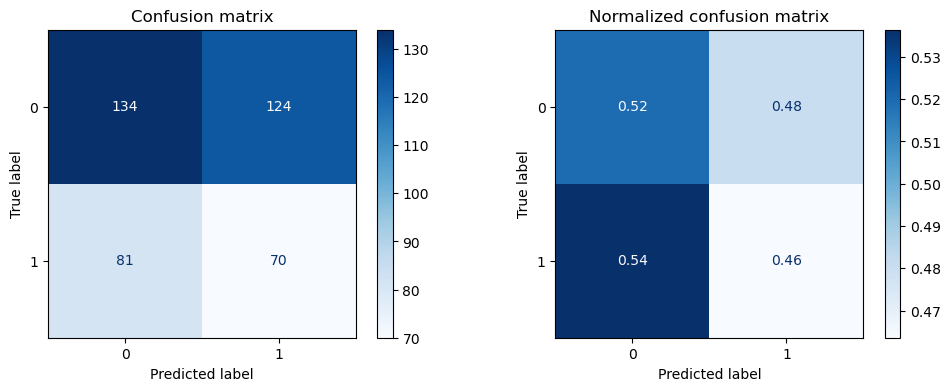

In [45]:
get_evaluation(y_test, prediction, ada, X_test)

스토리를 만들고, 점수가 잘나온다면 거기서 마무리.  
점수가 잘 나오지 않는다면, cycle을 더 돌려서 추가적으로 확인.  
결과 작성

-------------------

#### 부스팅(Boosting) - GBM(Gradient Boosting Machine)
**GradientBoostingClassifier(n_estimators, loss, learning_rate, subsample)**
- n_estimators: 약한 학습기의 개수이며, 개수가 많을 수록 일정 수준까지는 좋아지지만 많을 수록 시간도 오래 걸리고 과적합의 위험이 있다.
- loss: 경사 하강법에서 사용할 loss function을 지정한다(default: 'log_loss'). 만약 지수적 감쇠를 사용하고자 한다면, 'exponential'을 지정한다.
<img src='./images/classifier_loss_function01.png'>
<img src='./images/classifier_loss_function02.png'>

- learning_rate: 학습을 진행할 때마다 적용하는 학습률(0~1사이의 값), 약한 학습기가 순차적으로 오류값을 보정해나갈 때 적용하는 계수이며, 낮은 만큼 최소 손실값을 찾아 예측성능이 높아질 수 있지만, 그 만큼 많은 수의 트리가 필요하고 시간이 많이 소요된다(default: 1)
- subsample: 학습에 사용하는 데이터의 샘플링 비율이다(default: 1(100%)). 과적합 방지 시 1보다 작은 값으로 설정한다.

In [47]:
import pandas as pd

s_df = pd.read_csv('./datasets/stress_in_sleep.csv')
s_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr.1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

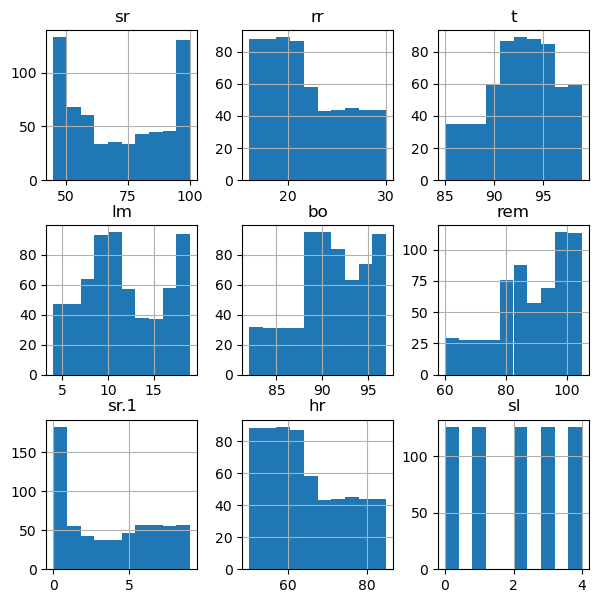

In [48]:
s_df.hist(figsize=(7, 7))

In [49]:
s_df.corr()['sl'].sort_values(ascending=False).iloc[1:]

sr      0.975322
lm      0.971071
hr      0.963516
rr      0.963516
rem     0.951988
bo     -0.961092
t      -0.962354
sr.1   -0.973036
Name: sl, dtype: float64

In [52]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier

features, targets = s_df.iloc[:, :-1], s_df.sl

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=3)
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [53]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.986111,7
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.986111,7
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.986111,7
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.988095,2
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.988095,2
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.988095,2
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.986111,7
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.988095,2
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.986111,7
9,"{'learning_rate': 1, 'n_estimators': 50}",0.988095,2


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [55]:
gbc = g_gbc.best_estimator_
prediction = gbc.predict(X_test)

오차 행렬
[[23  2  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  1 24  0]
 [ 0  0  0  0 26]]
정확도: 0.9762, 정밀도: 0.9775, 재현율: 0.9760, F1: 0.9760
################################################################################


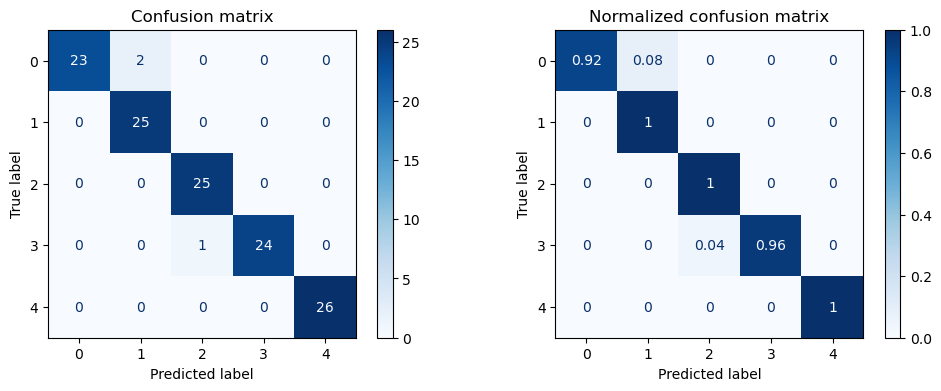

In [56]:
get_evaluation(y_test, prediction, gbc, X_test)

#### 부스팅(Boosting) - XGBoost(eXtra Gradient Boost)
**XGClassifier(n_estimators, learning_rate, subsample. eval_set, early_stopping_rounds)**
- eval_set: 예측 오류값을 줄일 수 있도록 반복하면서 학습이 진행되는데, 이 때 학습은 학습 데이터로 하고 예측 오류값 평가는 eval_set으로 지정된 검증 세트로 평가한다.
- early_stopping_rounds: 지정한 횟수동안 오류가 개선되지 않으면 더 이상 학습은 진행하지 않는다.

In [36]:
import xgboost

In [4]:
xgboost.__version__

'2.0.3'

In [37]:
import pandas as pd

o_df = pd.read_csv('./datasets/orange.csv')
o_df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [6]:
o_df.isna().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [38]:
pre_o_df = o_df.copy()

In [8]:
pre_o_df['Color'].value_counts()

Color
Deep Orange      75
Light Orange     64
Orange-Red       55
Orange           38
Yellow-Orange     9
Name: count, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder

columns = ['Color',	'Variety','Blemishes (Y/N)','Quality (1-5)']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    pre_o_df[column] = encoder.fit_transform(pre_o_df[column].tolist())
    encoders[column] = encoder.classes_.tolist()

In [14]:
encoders

{'Color': ['Deep Orange',
  'Light Orange',
  'Orange',
  'Orange-Red',
  'Yellow-Orange'],
 'Variety': ['Ambiance',
  'Blood Orange',
  'California Valencia',
  'Cara Cara',
  'Clementine',
  'Clementine (Seedless)',
  'Hamlin',
  'Honey Tangerine',
  'Jaffa',
  'Midsweet (Hybrid)',
  'Minneola (Hybrid)',
  'Moro (Blood)',
  'Murcott (Hybrid)',
  'Navel',
  'Navel (Early Season)',
  'Navel (Late Season)',
  'Ortanique (Hybrid)',
  'Satsuma Mandarin',
  'Star Ruby',
  'Tangelo (Hybrid)',
  'Tangerine',
  'Temple',
  'Valencia',
  'Washington Navel'],
 'Blemishes (Y/N)': ['N',
  'N (Minor)',
  'N (Split Skin)',
  'Y (Bruise)',
  'Y (Bruising)',
  'Y (Minor Insect Damage)',
  'Y (Minor)',
  'Y (Mold Spot)',
  'Y (Scars)',
  'Y (Split Skin)',
  'Y (Sunburn Patch)',
  'Y (Sunburn)'],
 'Quality (1-5)': [1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]}

In [40]:
pre_o_df['Quality (1-5)'].value_counts()

Quality (1-5)
5    76
7    52
6    29
3    26
4    23
1    14
2    12
0     9
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = pre_o_df.iloc[:,:-1], pre_o_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

y_train_over.value_counts()

Quality (1-5)
7    61
5    61
4    61
0    61
3    61
6    61
1    61
2    61
Name: count, dtype: int64

In [43]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(
    xgb,
    param_grid=parameters,
    cv=5,
    n_jobs=-1,
    refit=True,
    return_train_score=True
)

g_xgb.fit(X_train, y_train, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-mlogloss:1.12463	validation_1-mlogloss:1.09951
[1]	validation_0-mlogloss:0.76266	validation_1-mlogloss:0.68209
[2]	validation_0-mlogloss:0.55845	validation_1-mlogloss:0.47084
[3]	validation_0-mlogloss:0.39279	validation_1-mlogloss:0.36531
[4]	validation_0-mlogloss:0.29016	validation_1-mlogloss:0.26703
[5]	validation_0-mlogloss:0.23025	validation_1-mlogloss:0.21087
[6]	validation_0-mlogloss:0.18411	validation_1-mlogloss:0.16517
[7]	validation_0-mlogloss:0.14999	validation_1-mlogloss:0.13608
[8]	validation_0-mlogloss:0.12754	validation_1-mlogloss:0.12162
[9]	validation_0-mlogloss:0.11221	validation_1-mlogloss:0.10846
[10]	validation_0-mlogloss:0.10101	validation_1-mlogloss:0.09842
[11]	validation_0-mlogloss:0.09152	validation_1-mlogloss:0.08959
[12]	validation_0-mlogloss:0.08435	validation_1-mlogloss:0.08271
[13]	validation_0-mlogloss:0.07931	validation_1-mlogloss:0.07686
[14]	validation_0-mlogloss:0.07460	validation_1-mlogloss:0.07477
[15]	validation_0-mlogloss:0.07108	

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [44]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.436977,10
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.431849,11
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.431849,11
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.478812,7
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.468556,8
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.468556,8
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.489069,1
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.489069,1
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.489069,1
9,"{'learning_rate': 1, 'n_estimators': 50}",0.478947,4


In [45]:
xgb = g_xgb.best_estimator_
prediction = xgb.predict(X_test)

오차 행렬
[[ 0  0  1  0  0  1  0  0]
 [ 1  1  0  0  1  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  2  0  2  0  1  0  0]
 [ 0  1  0  2  2  0  0  0]
 [ 0  0  0  1  1 12  0  1]
 [ 0  0  0  1  0  0  5  0]
 [ 0  0  0  0  0  0  2  9]]
정확도: 0.6327, 정밀도: 0.4310, 재현율: 0.4481, F1: 0.4356
################################################################################


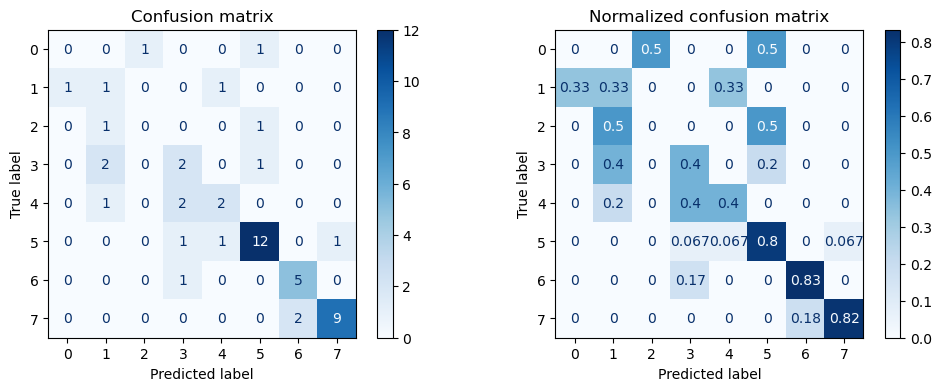

In [46]:
get_evaluation(y_test, prediction, xgb, X_test)

#### 부스팅(Boosting) - LightGBM(Light Gradient Boosting Machine)
**LGBMClassifier(n_estimators, learning_rate, subsample, eval_set)**
- n_estimators: default: 100

In [47]:
import pandas as pd

h_df = pd.read_csv('./datasets/hotel.csv', low_memory=False)
h_df

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17


In [4]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [48]:
pre_h_df = h_df.drop(labels=['index',
                             'market_segment',
                             'distribution_channel',
                             'arrival_date_year',
                             'arrival_date_month',
                             'arrival_date_week_number',
                             'arrival_date_day_of_month',
                             'deposit_type',
                             'meal',
                             'country',
                             'company',
                             'is_canceled',
                             'reservation_status_date'], axis=1)

In [49]:
pre_h_df.isna().sum()

hotel                                 0
lead_time                             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
agent                             16340
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
dtype: int64

In [50]:
pre_h_df = pre_h_df[~pre_h_df.agent.isna()].reset_index(drop=True)

In [51]:
pre_h_df.children = pre_h_df.children.fillna(0)

In [52]:
pre_h_df.isna().sum()

hotel                             0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
dtype: int64

In [53]:
pre_h_df.customer_type = pre_h_df.customer_type.astype('category')

In [54]:
pre_h_df.reservation_status = pre_h_df.reservation_status.astype('category')

In [55]:
pre_h_df.hotel = pre_h_df.hotel.astype('category')
pre_h_df.reserved_room_type = pre_h_df.reserved_room_type.astype('category') 
pre_h_df.assigned_room_type = pre_h_df.assigned_room_type.astype('category') 

In [56]:
pre_h_df

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,13,0,1,1,0.0,0,0,0,0,A,A,0,304.0,0,Transient,75.00,0,0,Check-Out
1,Resort Hotel,14,0,2,2,0.0,0,0,0,0,A,A,0,240.0,0,Transient,98.00,0,1,Check-Out
2,Resort Hotel,14,0,2,2,0.0,0,0,0,0,A,A,0,240.0,0,Transient,98.00,0,1,Check-Out
3,Resort Hotel,9,0,2,2,0.0,0,0,0,0,C,C,0,303.0,0,Transient,103.00,0,1,Check-Out
4,Resort Hotel,85,0,3,2,0.0,0,0,0,0,A,A,0,240.0,0,Transient,82.00,0,1,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103045,City Hotel,23,2,5,2,0.0,0,0,0,0,A,A,0,394.0,0,Transient,96.14,0,0,Check-Out
103046,City Hotel,102,2,5,3,0.0,0,0,0,0,E,E,0,9.0,0,Transient,225.43,0,2,Check-Out
103047,City Hotel,34,2,5,2,0.0,0,0,0,0,D,D,0,9.0,0,Transient,157.71,0,4,Check-Out
103048,City Hotel,109,2,5,2,0.0,0,0,0,0,A,A,0,89.0,0,Transient,104.40,0,0,Check-Out


In [57]:
pre_h_df.reservation_status.value_counts()

reservation_status
Check-Out    62856
Canceled     39191
No-Show       1003
Name: count, dtype: int64

array([[<Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'stays_in_weekend_nights'}>,
        <Axes: title={'center': 'stays_in_week_nights'}>,
        <Axes: title={'center': 'adults'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'is_repeated_guest'}>,
        <Axes: title={'center': 'previous_cancellations'}>],
       [<Axes: title={'center': 'previous_bookings_not_canceled'}>,
        <Axes: title={'center': 'booking_changes'}>,
        <Axes: title={'center': 'agent'}>,
        <Axes: title={'center': 'days_in_waiting_list'}>],
       [<Axes: title={'center': 'adr'}>,
        <Axes: title={'center': 'required_car_parking_spaces'}>,
        <Axes: title={'center': 'total_of_special_requests'}>, <Axes: >]],
      dtype=object)

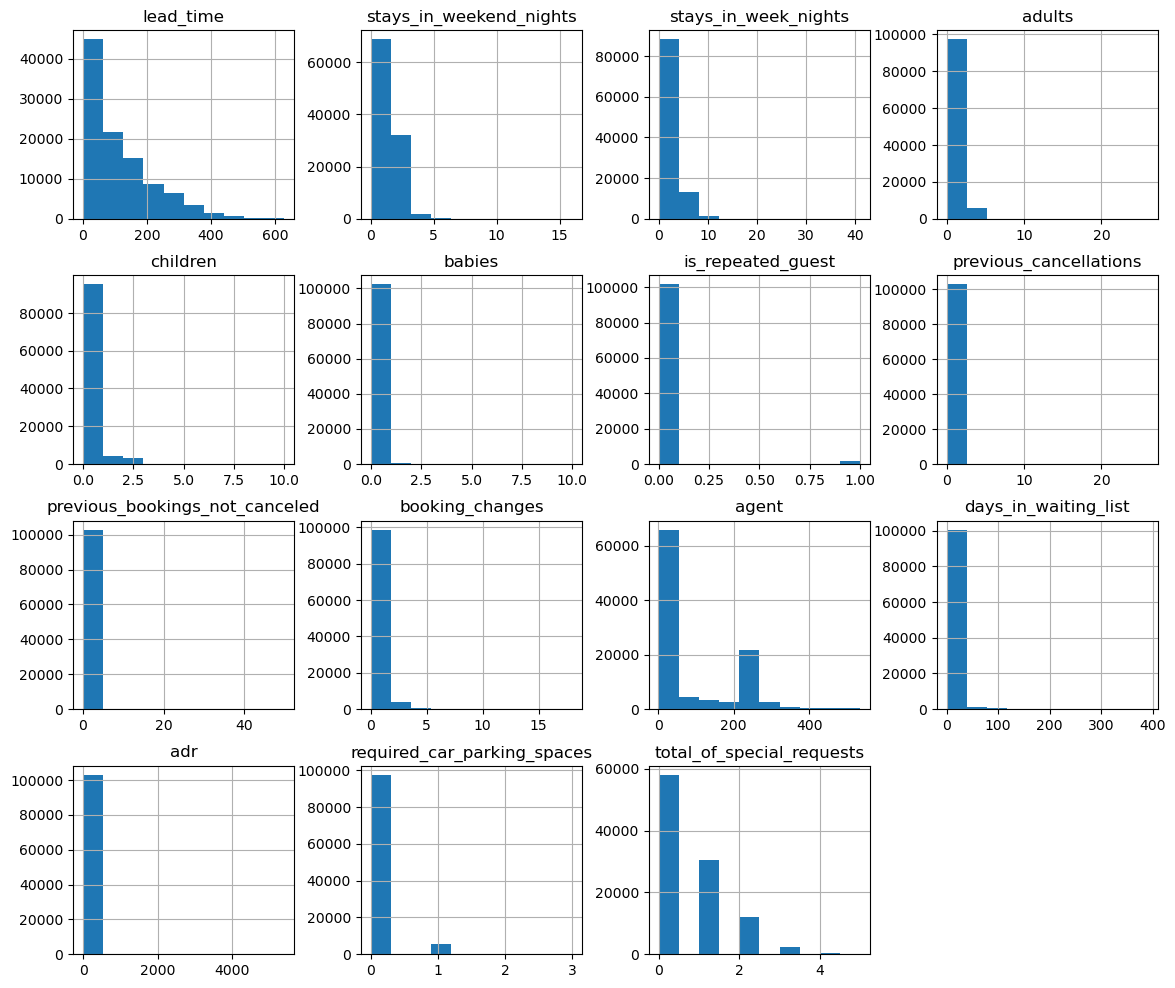

In [58]:
pre_h_df.hist(figsize=(14,12))

In [59]:
pre_h_df.isna().sum()

hotel                             0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
dtype: int64

In [60]:
import lightgbm

In [17]:
lightgbm.__version__

'4.3.0'

In [61]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier


features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train, y_train, eval_set=evals)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 82440, number of used features: 19
[LightGBM] [Info] Start training from score -0.966761
[LightGBM] [Info] Start training from score -0.494364
[LightGBM] [Info] Start training from score -4.632717


GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [62]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params','mean_test_score','rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.834947,3
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.840623,1
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.836366,2
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.828227,4
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.823217,5
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.696749,10
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.815417,6
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.798314,8
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.621312,11
9,"{'learning_rate': 1, 'n_estimators': 50}",0.809680,7


In [63]:
lgbm = g_lgbm.best_estimator_

In [64]:
prediction = lgbm.predict(X_test)

오차 행렬
[[ 5899  1925    14]
 [ 1131 11407    33]
 [   34   134    33]]
정확도: 0.8413, 정밀도: 0.6982, 재현율: 0.6081, F1: 0.6343
################################################################################


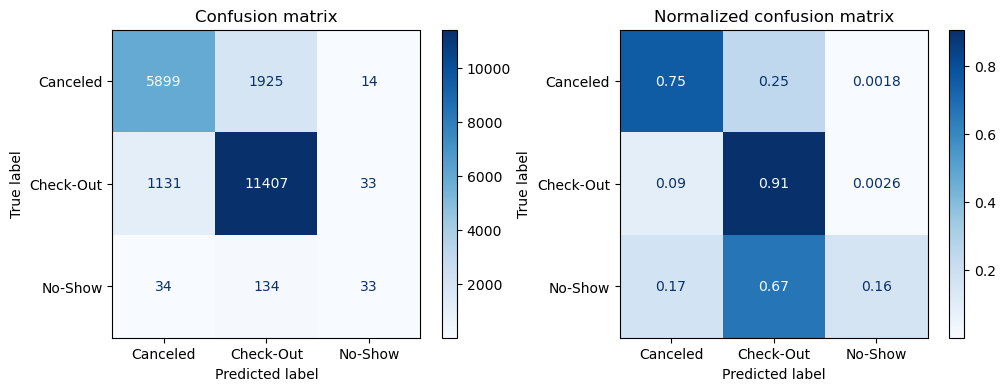

In [65]:
get_evaluation(y_test, prediction, lgbm, X_test)

In [66]:
from sklearn.preprocessing import LabelEncoder

columns= ['hotel', 'customer_type','reservation_status','reserved_room_type','assigned_room_type']

encoders = {}

for column in columns:
    encoder = LabelEncoder()
    pre_h_df[column] = encoder.fit_transform(pre_h_df[column].tolist())
    encoders[column] = encoder.classes_.tolist()

In [67]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier


features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1251
[LightGBM] [Info] Number of data points in the train set: 150855, number of used features: 19
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [68]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params','mean_test_score','rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.842259,9
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.866057,4
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.900235,1
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.857864,7
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.877631,3
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.860568,6
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.864970,5
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.880660,2
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.750363,11
9,"{'learning_rate': 1, 'n_estimators': 50}",0.852978,8


In [69]:
lgbm = g_lgbm.best_estimator_

In [70]:
prediction = lgbm.predict(X_test)

오차 행렬
[[ 6314  1439    85]
 [ 1516 10854   201]
 [   37   100    64]]
정확도: 0.8361, 정밀도: 0.6204, 재현율: 0.6625, F1: 0.6353
################################################################################


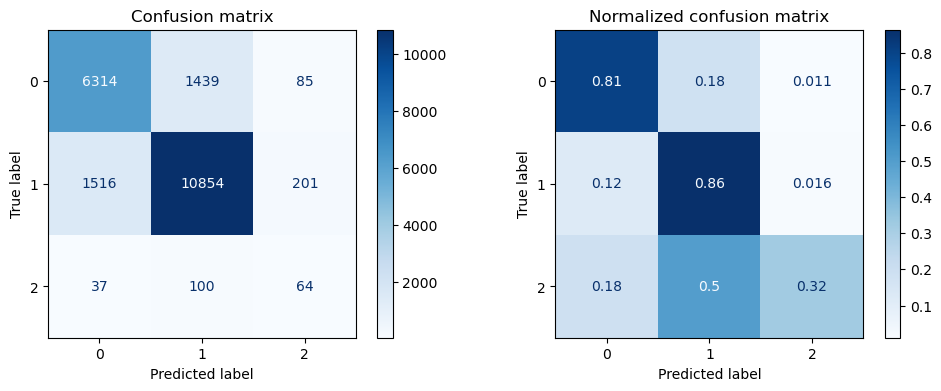

In [71]:
get_evaluation(y_test, prediction, lgbm, X_test)